In [226]:
import pandas as pd

In [227]:
all_job_df = pd.read_csv('glassdoor_jobs.csv')
df = all_job_df.iloc[:,1:]

# shape of datasets
print("1. Shape of Data Scientist datasets are : ",df.shape)
print("Number of rows: ",df.shape[0])
print("Number of columns: ",df.shape[1])

1. Shape of Data Scientist datasets are :  (956, 14)
Number of rows:  956
Number of columns:  14


In [228]:
print("Handle Missing column in  datasets:")
print(df.isnull().any().any())

Handle Missing column in  datasets:
False


In [229]:
# Remove Duplicate Rows
duplicates = df.duplicated().sum()
print("\nDuplicate Rows:",duplicates)

df.drop_duplicates(inplace=True)


Duplicate Rows: 356


In [230]:
# Summary for the salary variable
df['Salary_clean'] = df['Salary Estimate'].str.replace(r'[^0-9\-]', '', regex=True)
df[['Min_Salary', 'Max_Salary']] = df['Salary_clean'].str.split('-', expand=True)
df['Min_Salary'] = pd.to_numeric(df['Min_Salary'])
df['Max_Salary'] = pd.to_numeric(df['Max_Salary'])
df['Avg_Salary'] = (df['Min_Salary'] + df['Max_Salary']) / 2
mean_salary = df['Avg_Salary'].mean()
median_salary = df['Avg_Salary'].median()
min_salary = df['Avg_Salary'].min()
max_salary = df['Avg_Salary'].max()
range_salary = max_salary - min_salary

print("Mean Salary:", mean_salary)
print("Median Salary:", median_salary)
print("Min Salary:", min_salary)
print("Max Salary:", max_salary)
print("Range:", range_salary)


df[['Min_Salary', 'Max_Salary', 'Avg_Salary']].describe()

Mean Salary: 100.97858672376874
Median Salary: 97.5
Min Salary: 13.5
Max Salary: 254.0
Range: 240.5


,Min_Salary,Max_Salary,Avg_Salary
count,467.000000,600.00000,467.000000
mean,74.334047,99.55500,100.978587
std,30.550454,66.00926,37.318755
min,10.000000,1.00000,13.500000
25%,53.000000,57.00000,76.000000
50%,71.000000,111.00000,97.500000
75%,90.500000,142.00000,121.000000
max,202.000000,306.00000,254.000000


Skewness: 0.6356456590324572
Distribution Type: Right-Skewed Distribution (Tail on Right)


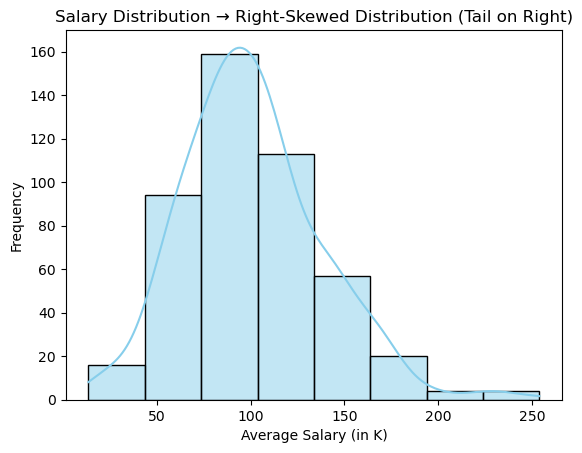

In [231]:
skew_value = df['Avg_Salary'].skew()
print("Skewness:", skew_value)
if abs(skew_value) < 0.5:
    shape = "Normal Distribution (Symmetric)"
elif skew_value > 0.5:
    shape = "Right-Skewed Distribution (Tail on Right)"
else:
    skew_value = "Left-Skewed Distribution (Tail on Left)"

print("Distribution Type:", shape)

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Avg_Salary'], kde=True, bins=8, color='skyblue')
plt.title(f"Salary Distribution → {shape}")
plt.xlabel("Average Salary (in K)")
plt.ylabel("Frequency")
plt.show()

In [232]:
from scipy.signal import find_peaks
import numpy as np

# Compute density
sns_kde = sns.kdeplot(df['Avg_Salary']).get_lines()[0].get_data()
plt.close()  # close previous plot

y = sns_kde[1]
peaks, _ = find_peaks(y)

if len(peaks) > 1:
    multi = True
else:
    multi = False

if multi:
    print("Distribution is Multimodal (multiple peaks detected).")
else:
    print("Distribution appears Unimodal (single main peak).")

Distribution is Multimodal (multiple peaks detected).


In [233]:

# Find most frequent job titles
top_job_titles = df['Job Title'].value_counts()

# Display top 10 most common titles
print(top_job_titles.head(10))

Job Title
Data Scientist                   137
Data Engineer                     46
Senior Data Scientist             25
Data Analyst                      15
Business Intelligence Analyst      9
Senior Data Engineer               9
Senior Data Analyst                7
Lead Data Scientist                5
Principal Data Scientist           4
Machine Learning Engineer          4
Name: count, dtype: int64


Experience_Level
Mid-level       431
Senior-level    167
Entry-level       2
Name: count, dtype: int64


/var/folders/xm/_hz712rx0snbwdrmtcrssv3m0000gn/T/ipykernel_1453/1489280788.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exp_counts.index, y=exp_counts.values, palette='viridis')


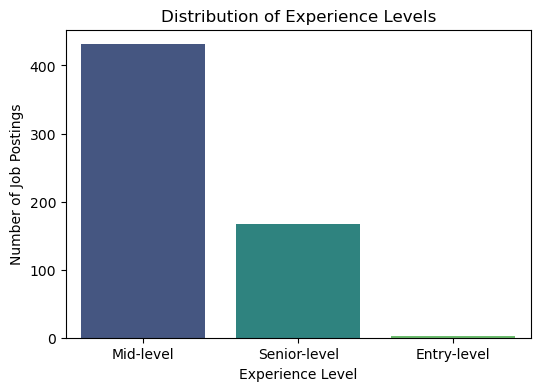

In [234]:
def extract_experience_level(text):
    text = text.lower()
    if 'entry' in text or 'junior' in text or 'fresher' in text:
        return 'Entry-level'
    elif 'mid' in text or 'intermediate' in text or '3-5 years' in text:
        return 'Mid-level'
    elif 'senior' in text or 'lead' in text or 'principal' in text or 'manager' in text or 'sr' in text:
        return 'Senior-level'
    else:
        return 'Mid-level'

df['Experience_Level'] = df['Job Title'].apply(extract_experience_level)

exp_counts = df['Experience_Level'].value_counts()
print(exp_counts)


plt.figure(figsize=(6,4))
sns.barplot(x=exp_counts.index, y=exp_counts.values, palette='viridis')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Number of Job Postings')
plt.show()

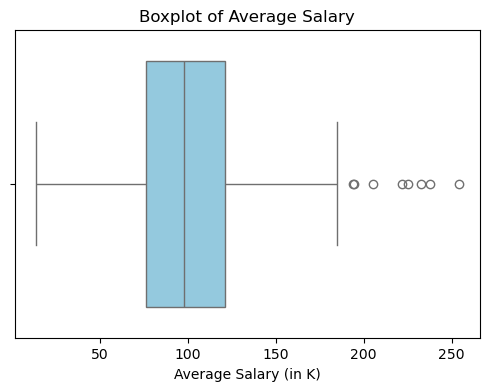

In [235]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Avg_Salary'], color='skyblue')
plt.title('Boxplot of Average Salary')
plt.xlabel('Average Salary (in K)')
plt.show()

In [236]:
def map_company_size(size):
    if '1 to 50' in size or '51 to 200' in size:
        return 1
    elif '201 to 500' in size or '501 to 1000' in size:
        return 2
    elif '1001 to 5000' in size:
        return 3
    elif '5001 to 10000' in size:
        return 4
    elif '10000+' in size:
        return 5
    else:
        return None

df['Company_Size_Code'] = df['Size'].apply(map_company_size)

exp_map = {'Entry-level': 1, 'Mid-level': 2, 'Senior': 3}
df['Exp_Level_Code'] = df['Experience_Level'].map(exp_map)
correlation = df[['Avg_Salary', 'Company_Size_Code', 'Exp_Level_Code']].corr()
print(correlation)

                   Avg_Salary  Company_Size_Code  Exp_Level_Code
Avg_Salary           1.000000           0.069243         0.07107
Company_Size_Code    0.069243           1.000000         0.02031
Exp_Level_Code       0.071070           0.020310         1.00000


/var/folders/xm/_hz712rx0snbwdrmtcrssv3m0000gn/T/ipykernel_1453/2942023808.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exp_Level_Code', y='Avg_Salary', data=df, palette='Greens')


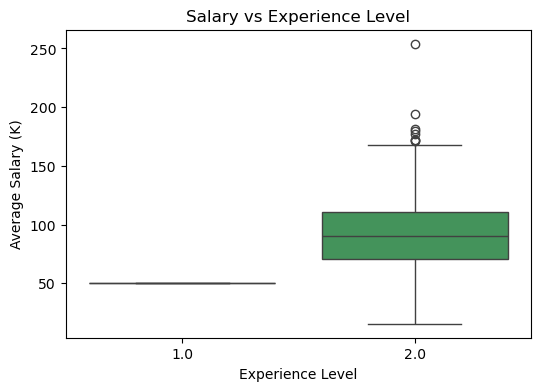

In [237]:

plt.figure(figsize=(6,4))
sns.boxplot(x='Exp_Level_Code', y='Avg_Salary', data=df, palette='Greens')
plt.title('Salary vs Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (K)')
plt.show()

/var/folders/xm/_hz712rx0snbwdrmtcrssv3m0000gn/T/ipykernel_1453/430610067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company_Size_Code', y='Avg_Salary', data=df, palette='Blues')


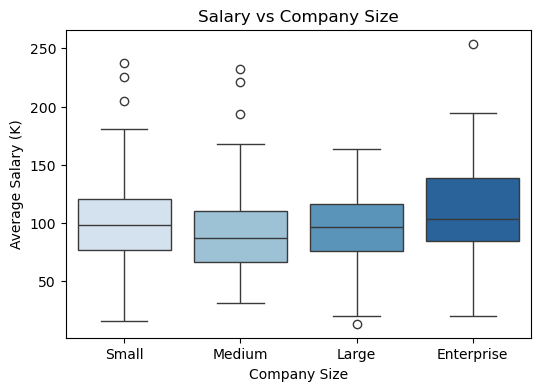

In [238]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Company_Size_Code', y='Avg_Salary', data=df, palette='Blues')
plt.xticks([0,1,2,3], ['Small', 'Medium', 'Large', 'Enterprise'])
plt.title('Salary vs Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary (K)')
plt.show()

In [239]:
def extract_country(hq):
    hq = hq.lower()
    if 'united kingdom' in hq or 'london' in hq:
        return 'United Kingdom'
    elif 'canada' in hq or 'toronto' in hq:
        return 'Canada'
    elif 'india' in hq or 'bangalore' in hq:
        return 'India'
    elif 'switzerland' in hq:
        return 'Switzerland'
    elif 'germany' in hq:
        return 'Germany'
    elif 'japan' in hq:
        return 'Japan'
    elif any(state in hq for state in ['ca', 'ny', 'tx', 'il','va','ma','dc','ut']):  # U.S. states
        return 'USA'
    else:
        return "Others"

df['Country'] = df['Headquarters'].apply(extract_country)

In [240]:
country_salary = df.groupby('Country')['Avg_Salary'].mean().reset_index()
country_salary = country_salary.sort_values(by='Avg_Salary', ascending=False)
top5 = country_salary.head(5)
print(top5)

          Country  Avg_Salary
2           Japan  128.571429
0         Germany  118.833333
4     Switzerland  118.785714
6  United Kingdom  107.150000
5             USA  104.251572


/var/folders/xm/_hz712rx0snbwdrmtcrssv3m0000gn/T/ipykernel_1453/4053782782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Avg_Salary', data=top5, palette='viridis')


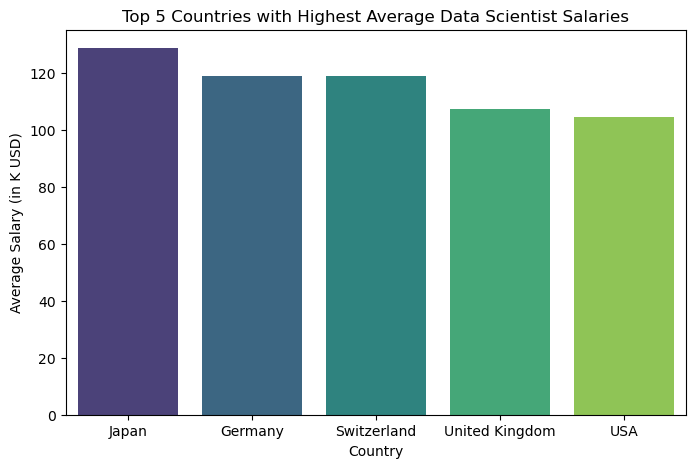

In [241]:
plt.figure(figsize=(8,5))
sns.barplot(x='Country', y='Avg_Salary', data=top5, palette='viridis')
plt.title('Top 5 Countries with Highest Average Data Scientist Salaries')
plt.xlabel('Country')
plt.ylabel('Average Salary (in K USD)')
plt.show()

  Job_Type  Avg_Salary
0  On-site  100.965665
1   Remote  107.000000


/var/folders/xm/_hz712rx0snbwdrmtcrssv3m0000gn/T/ipykernel_1453/737860775.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Job_Type', y='Avg_Salary', data=salary_comparison, palette='coolwarm')


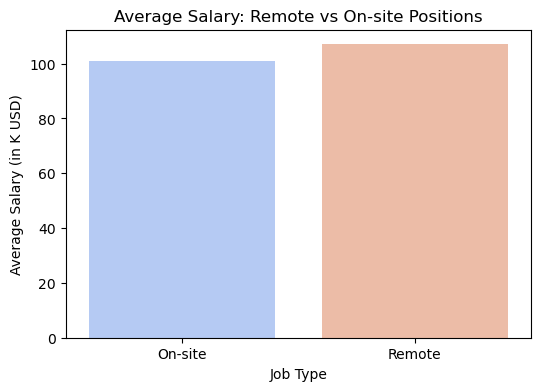

In [242]:
def classify_job(location):
    if 'remote' in location.lower():
        return 'Remote'
    else:
        return 'On-site'

df['Job_Type'] = df['Job Title'].apply(classify_job)
salary_comparison = df.groupby('Job_Type')['Avg_Salary'].mean().reset_index()
print(salary_comparison)


plt.figure(figsize=(6,4))
sns.barplot(x='Job_Type', y='Avg_Salary', data=salary_comparison, palette='coolwarm')
plt.title('Average Salary: Remote vs On-site Positions')
plt.xlabel('Job Type')
plt.ylabel('Average Salary (in K USD)')
plt.show()

In [243]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                     Rating   Founded  Min_Salary  Max_Salary  Avg_Salary  \
Rating             1.000000  0.478804   -0.018445    0.037372    0.009726   
Founded            0.478804  1.000000   -0.047753    0.147052   -0.022997   
Min_Salary        -0.018445 -0.047753    1.000000    0.941727    0.979073   
Max_Salary         0.037372  0.147052    0.941727    1.000000    0.990476   
Avg_Salary         0.009726 -0.022997    0.979073    0.990476    1.000000   
Company_Size_Code -0.065779  0.021026    0.068339    0.187821    0.069243   
Exp_Level_Code     0.005335 -0.019992    0.064177    0.064633    0.071070   

                   Company_Size_Code  Exp_Level_Code  
Rating                     -0.065779        0.005335  
Founded                     0.021026       -0.019992  
Min_Salary                  0.068339        0.064177  
Max_Salary                  0.187821        0.064633  
Avg_Salary                  0.069243        0.071070  
Company_Size_Code           1.000000        0.020310 

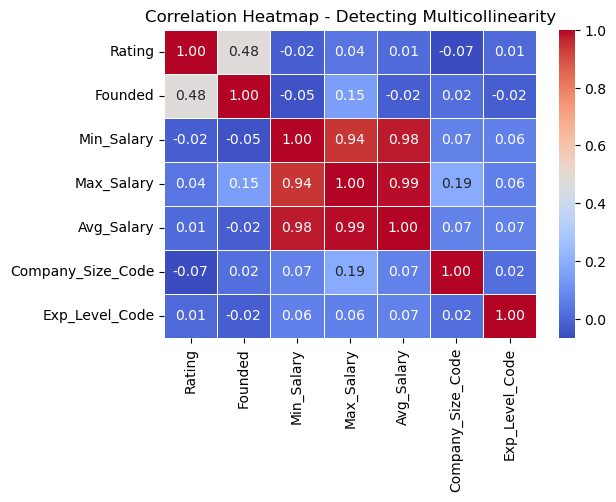

In [244]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - Detecting Multicollinearity')
plt.show()

/var/folders/xm/_hz712rx0snbwdrmtcrssv3m0000gn/T/ipykernel_1453/4220401938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sector', y='Avg_Salary', data=df, palette='viridis')


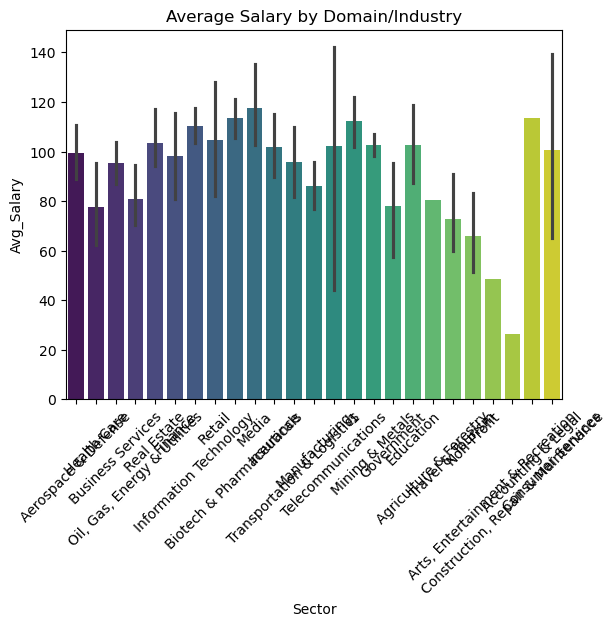

In [245]:
doamin_salary = df.groupby('Sector')['Avg_Salary'].mean().reset_index()
sns.barplot(x='Sector', y='Avg_Salary', data=df, palette='viridis')
plt.title('Average Salary by Domain/Industry')
plt.xticks(rotation=45)
plt.show()

In [246]:
# 1.Handle Missing Values
#2. Clean and Convert Salary Data
# 3. Encode Categorical Variables
# 4. Handle Outliers
# 5. Feature Scaling
# 6. Split Data into Train/Test Sets
# 7. Feature Selection / Dimensionality Reduction

# Fill missing numeric values with mean or median
df['Rating'].fillna(df['Rating'].median(), inplace=True)

# Fill missing categorical values with mode (most frequent)
df['Industry'].fillna(df['Industry'].mode()[0], inplace=True)

df['Sector'].fillna(df['Sector'].mode()[0], inplace=True)
df['Min_Salary'] = df['Salary Estimate'].str.extract(r'\$?(\d+)[Kk]')
df['Max_Salary'] = df['Salary Estimate'].str.extract(r'\$?\d+[Kk].*?(\d+)[Kk]')
df['Min_Salary'] = df['Min_Salary'].astype(float)
df['Max_Salary'] = df['Max_Salary'].astype(float)
df['Avg_Salary'] = (df['Min_Salary'] + df['Max_Salary']) / 2

from sklearn.preprocessing import LabelEncoder

# Label encode ordered column
exp_encoder = LabelEncoder()
df['Experience_Level'] = exp_encoder.fit_transform(df['Experience_Level'])

# One-hot encode nominal features
df = pd.get_dummies(df, columns=['Industry', 'Size', 'Location'], drop_first=True)

/var/folders/xm/_hz712rx0snbwdrmtcrssv3m0000gn/T/ipykernel_1453/30007454.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].median(), inplace=True)
/var/folders/xm/_hz712rx0snbwdrmtcrssv3m0000gn/T/ipykernel_1453/30007454.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 